In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from nltk.corpus import stopwords

In [2]:
stopwords = stopwords.words('english')
sns.set_context('notebook')

In [4]:
data=pd.read_csv('inspection data.csv')
data1=pd.read_excel('RTO_details.xlsx')

C:\Users\sj\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.info()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605926 entries, 0 to 605925
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             605926 non-null  int64  
 1   KMS            593635 non-null  float64
 2   SALE_DT        593658 non-null  object 
 3   REPORT_DT      593658 non-null  object 
 4   REPAIR_DT      593658 non-null  object 
 5   MODEL          593658 non-null  object 
 6   SUB_MODEL      151610 non-null  object 
 7   CMPL_DESC      605866 non-null  object 
 8   INVESTIGATION  605845 non-null  object 
 9   ACTION_TAKEN   605815 non-null  object 
 10  REG_NO         605831 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 50.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RegNo   1135 non-null   object
 1   Place   1135 non-null 

# join two tables


In [6]:
#to join two tables we need a common attribute create a common attribute 
data['REG_NO'][1][0:4]

'HR38'

In [7]:
#split registration no. and save this data into other column.
data["RegNo"]= data["REG_NO"].str[0:4]


In [8]:
#merge two data 
df=pd.merge(data,data1,on='RegNo',how='left')

# clean data and remove unneccasry data

In [9]:
#check null values
print(df.shape)
print(df.isna().sum())


(608697, 14)
id                    0
KMS               12369
SALE_DT           12346
REPORT_DT         12346
REPAIR_DT         12346
MODEL             12346
SUB_MODEL        456262
CMPL_DESC            60
INVESTIGATION        81
ACTION_TAKEN        111
REG_NO               95
RegNo                95
Place             58714
State             58714
dtype: int64


In [10]:
#here we can see total data  is 605926 and submodel has more null values are 454316 drop this column
df.drop(labels='SUB_MODEL',axis=1,inplace=True)

In [11]:
df.isna().sum()

id                   0
KMS              12369
SALE_DT          12346
REPORT_DT        12346
REPAIR_DT        12346
MODEL            12346
CMPL_DESC           60
INVESTIGATION       81
ACTION_TAKEN       111
REG_NO              95
RegNo               95
Place            58714
State            58714
dtype: int64

In [12]:
#drop null values 
df.dropna(inplace=True)

In [13]:
#now our data  set is clean and check there is any duplicate values
df.duplicated().sum()

0

In [14]:
df.iloc[49:58]

,id,KMS,SALE_DT,REPORT_DT,REPAIR_DT,MODEL,CMPL_DESC,INVESTIGATION,ACTION_TAKEN,REG_NO,RegNo,Place,State
49,50,120060.0,30-01-2016,02-02-2018,03-02-2018,4018TC-LPS,GEAR BOX NOISY.,AFTER CONFIRMING THE COMPLAINT WE DISMENTALLED...,REPLACED ALL THE FAILED PARTS U/W.DEFER.TXT 0004,CG07AZ9097,CG07,Durg,Chhattisgarh
50,51,120060.0,30-01-2016,02-02-2018,03-02-2018,4018TC-LPS,GEAR BOX NOISY.,AFTER CONFIRMING THE COMPLAINT WE DISMENTALLED...,REPLACED ALL THE FAILED PARTS U/W.DEFER.TXT 0004,CG07AZ9097,CG07,Durg,Chhattisgarh
51,52,120060.0,30-01-2016,02-02-2018,03-02-2018,4018TC-LPS,GEAR BOX NOISY.,AFTER CONFIRMING THE COMPLAINT WE DISMENTALLED...,REPLACED ALL THE FAILED PARTS U/W.DEFER.TXT 0004,CG07AZ9097,CG07,Durg,Chhattisgarh
52,53,110384.0,14-02-2014,23-01-2018,29-01-2018,2518TC-LPK,NOISE FROM THE GEAR BOX IN 2ND SPEED GEAR .CLU...,NO EXTERNAL LEAKAGE FOUND FURTHER DISMANTLED T...,REPLACED THE GEAR BOX DEFECTIVE PARTS WITH NEW...,KA42A2402,KA42,Ramanagara,Karnataka
53,54,110384.0,14-02-2014,23-01-2018,29-01-2018,2518TC-LPK,NOISE FROM THE GEAR BOX IN 2ND SPEED GEAR .CLU...,NO EXTERNAL LEAKAGE FOUND FURTHER DISMANTLED T...,REPLACED THE GEAR BOX DEFECTIVE PARTS WITH NEW...,KA42A2402,KA42,Ramanagara,Karnataka
54,55,110384.0,14-02-2014,23-01-2018,29-01-2018,2518TC-LPK,NOISE FROM THE GEAR BOX IN 2ND SPEED GEAR .CLU...,NO EXTERNAL LEAKAGE FOUND FURTHER DISMANTLED T...,REPLACED THE GEAR BOX DEFECTIVE PARTS WITH NEW...,KA42A2402,KA42,Ramanagara,Karnataka
55,56,110384.0,14-02-2014,23-01-2018,29-01-2018,2518TC-LPK,NOISE FROM THE GEAR BOX IN 2ND SPEED GEAR .CLU...,NO EXTERNAL LEAKAGE FOUND FURTHER DISMANTLED T...,REPLACED THE GEAR BOX DEFECTIVE PARTS WITH NEW...,KA42A2402,KA42,Ramanagara,Karnataka
56,57,110384.0,14-02-2014,23-01-2018,29-01-2018,2518TC-LPK,NOISE FROM THE GEAR BOX IN 2ND SPEED GEAR .CLU...,NO EXTERNAL LEAKAGE FOUND FURTHER DISMANTLED T...,REPLACED THE GEAR BOX DEFECTIVE PARTS WITH NEW...,KA42A2402,KA42,Ramanagara,Karnataka
57,58,110384.0,14-02-2014,23-01-2018,29-01-2018,2518TC-LPK,NOISE FROM THE GEAR BOX IN 2ND SPEED GEAR .CLU...,NO EXTERNAL LEAKAGE FOUND FURTHER DISMANTLED T...,REPLACED THE GEAR BOX DEFECTIVE PARTS WITH NEW...,KA42A2402,KA42,Ramanagara,Karnataka


In [15]:
#here we can see that many cars has same issues on same date but from different id, so we can drop id column and check how many duplicate rows are in dataset.
df1=df.drop(labels='id',axis=1)

In [16]:
print(df1.duplicated().sum())
print(df1.shape)

469500
(538477, 12)


In [17]:
#drop these duplicate values
df1.drop_duplicates(inplace=True)

In [18]:
df1.shape

(68977, 12)

In [19]:
#make a copy of dataset
df2=df1.copy()

In [20]:
#now extract years and months from sales,report and repair dataset
df2['salesyear'] = pd.DatetimeIndex(df2['SALE_DT']).year
df2['repairyear'] = pd.DatetimeIndex(df2['REPAIR_DT']).year
df2['reportyear'] = pd.DatetimeIndex(df2['REPORT_DT']).year


In [21]:
df2['salesmonth']=pd.DatetimeIndex(df2['SALE_DT']).month
df2['repairmonth']=pd.DatetimeIndex(df2['REPAIR_DT']).month
df2['reportmonth']=pd.DatetimeIndex(df2['REPORT_DT']).month


In [22]:
#drop sales repair and report date
df2.drop(labels=['REPORT_DT','SALE_DT','REPAIR_DT'],axis=1,inplace=True)

In [23]:
df2.head()

,KMS,MODEL,CMPL_DESC,INVESTIGATION,ACTION_TAKEN,REG_NO,RegNo,Place,State,salesyear,repairyear,reportyear,salesmonth,repairmonth,reportmonth
0,221928.0,2518TC-LPT,VEHICLE HAS COME WITH COMPLAINT OIL LEACKEGE F...,AFTER INVESTIGATION WE FOUND MINOR CRAKE ON RE...,WE HAVE REPLACED REAR AXLE TUBE U/WARRANTYDEFE...,HR38U8155,HR38,Faridabad (commercial vehicles only),Haryana,2014,2017,2017,10,10,10
3,185050.0,3518TC-LPS,DIFFERENTIAL NOISY.,AFTER INVESTIGATION WE ARE FOUND THAT CROWN TA...,ALL JOB CARRIED OUT UNDER WARRANTY.,NL01L2162,NL01,Kohima,Nagaland,2014,2017,2017,2,12,12
11,217890.0,2518TC-LPT,VEHICLE HAS BRAKEDOWN WITH CAC COMPLAINT REAR ...,WE HAVE ATTEND THE VEHICLE ON SIDE FOUND THAT ...,REPLACED REAR AXLE TUBE UNDER WARRANTYDEFER.TX...,UP82T2306,UP82,Etah,Uttar Pradesh,2014,2017,2017,8,12,12
14,150723.0,2518TC-LPT,ASSY GEAR BOX NOISY,VEHICLE CAME IN OUR WORKSHOP ASSY GEAR BOX NOI...,REPLCED UNDER WARRANTYDEFER.TXT 0006,UP15CT2727,UP15,"Meerut (UP15AT for taxis, UP15AG for governmen...",Uttar Pradesh,2015,2017,2017,8,12,12
22,162639.0,2518TC-LPT,DIFFERENTIAL NOISY.,ON INVESTIGATION FOUND THE CROWN AND PINION TE...,AFFECTED PARTS REPLACED UNDER WARRANTY.DEFER.T...,MP20HB5022,MP20,Jabalpur,Madhya Pradesh,2014,2017,2017,11,12,12


# Plot a graph to check in which model has sell in 2013

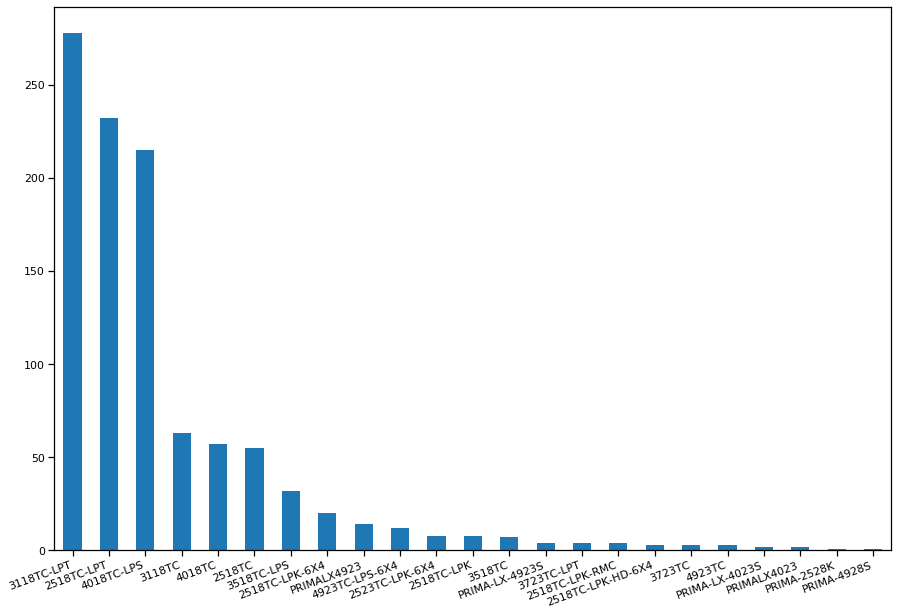

In [29]:
plt.figure(figsize=(15,10))
chart = df2[df2['salesyear'] == 2013]['MODEL'].value_counts().plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
None

In [33]:
#Lets check in which state has high sell value

In [34]:
by_state = (df2
            .groupby('MODEL')
            .filter(lambda x : len(x) > 500)
            .groupby(['State', 'salesyear'])
            .size()
            .unstack()
           )


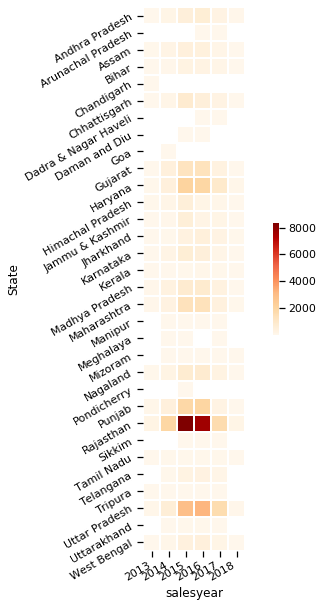

In [35]:
plt.figure(figsize=(10,10))
g = sns.heatmap(
    by_state, 
    square=True,
    cbar_kws={'fraction' : 0.01},
    cmap='OrRd',
    linewidth=1
)

g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=30, horizontalalignment='right')
None # prevent the list of label objects showing up annoyingly in the output


In [36]:
# check which model has highest sale in 2years

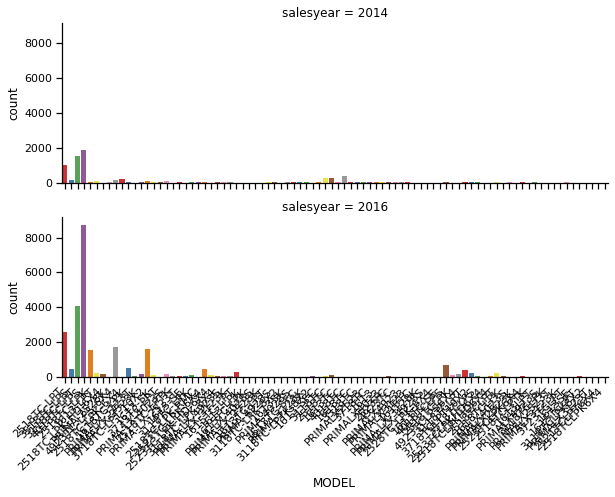

In [37]:
chart = sns.catplot(
    data=df2[df2['salesyear'].isin([2016, 2014])],
    x='MODEL',
    kind='count',
    palette='Set1',
    row='salesyear',
    aspect=3,
    height=3
)
plt.xticks(rotation=45, horizontalalignment='right')

None

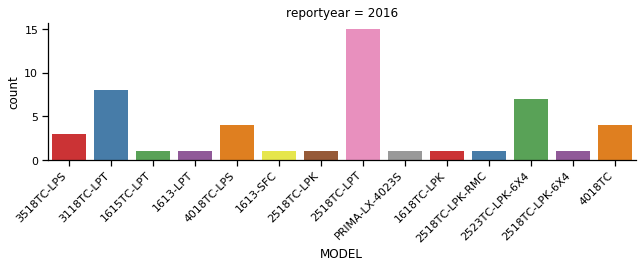

In [38]:
chart = sns.catplot(
    data=df2[df2['reportyear'].isin([2016, 2014])],
    x='MODEL',
    kind='count',
    palette='Set1',
    row='reportyear',
    aspect=3,
    height=3
)
plt.xticks(rotation=45, horizontalalignment='right')

None

In [ ]:
#here we can see 5 models are highly sale 

In [39]:
s=df2[['salesyear','MODEL','State','reportyear']]
s

,salesyear,MODEL,State,reportyear
0,2014,2518TC-LPT,Haryana,2017
3,2014,3518TC-LPS,Nagaland,2017
11,2014,2518TC-LPT,Uttar Pradesh,2017
14,2015,2518TC-LPT,Uttar Pradesh,2017
22,2014,2518TC-LPT,Madhya Pradesh,2017
...,...,...,...,...
608622,2015,4018TC-LPS,Rajasthan,2019
608629,2016,4923TC-LPS-6X4,Rajasthan,2019
608640,2015,3118TC-LPT,Madhya Pradesh,2019
608649,2017,3118TC-LPK,Gujarat,2019


In [ ]:
#now check top 5 model

In [40]:
x=(df2['MODEL'].value_counts()).head()

In [41]:
x

4018TC-LPS         21080
3118TC-LPT         12107
2518TC-LPT          8034
3718TC-LPT-10X2     4267
4923TC-LPS-6X4      2919
Name: MODEL, dtype: int64

In [42]:
#take key name of this 
a=x.keys().values

In [44]:
a

array(['4018TC-LPS', '3118TC-LPT', '2518TC-LPT', '3718TC-LPT-10X2',
       '4923TC-LPS-6X4'], dtype=object)

In [43]:
a[0] #top 1 model

'4018TC-LPS'

In [45]:
#create function  for splitting dataset

In [46]:
def split_it(x):
    '''x is a feature and text1 is a substring which we want'''
    m = re.search(text1, x)
    if m:
        return m.group()

In [47]:
text1=a[0]
s['M1']=s["MODEL"].apply(split_it)
s['M1'] = np.where(s['M1'] == s['MODEL'], a[0],None )


C:\Users\sj\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sj\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
s

,salesyear,MODEL,State,reportyear,M1
0,2014,2518TC-LPT,Haryana,2017,None
3,2014,3518TC-LPS,Nagaland,2017,None
11,2014,2518TC-LPT,Uttar Pradesh,2017,None
14,2015,2518TC-LPT,Uttar Pradesh,2017,None
22,2014,2518TC-LPT,Madhya Pradesh,2017,None
...,...,...,...,...,...
608622,2015,4018TC-LPS,Rajasthan,2019,4018TC-LPS
608629,2016,4923TC-LPS-6X4,Rajasthan,2019,None
608640,2015,3118TC-LPT,Madhya Pradesh,2019,None
608649,2017,3118TC-LPK,Gujarat,2019,None


In [49]:
#first model dataset
M1=s.loc[s['M1'] == a[0]]

In [50]:
M1

,salesyear,MODEL,State,reportyear,M1
47,2016,4018TC-LPS,Chhattisgarh,2018,4018TC-LPS
134,2015,4018TC-LPS,Chhattisgarh,2018,4018TC-LPS
207,2016,4018TC-LPS,Rajasthan,2018,4018TC-LPS
325,2015,4018TC-LPS,Rajasthan,2018,4018TC-LPS
329,2014,4018TC-LPS,Gujarat,2018,4018TC-LPS
...,...,...,...,...,...
608532,2016,4018TC-LPS,Chhattisgarh,2019,4018TC-LPS
608556,2017,4018TC-LPS,Haryana,2019,4018TC-LPS
608583,2015,4018TC-LPS,Rajasthan,2019,4018TC-LPS
608622,2015,4018TC-LPS,Rajasthan,2019,4018TC-LPS


In [51]:
#now can check in  which year m1 model car has sold and report or check in which state is sell.

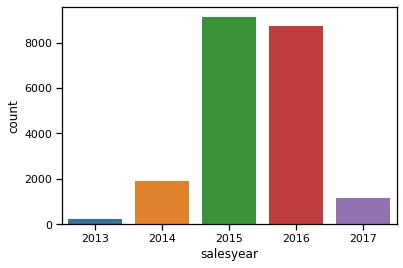

In [52]:
ax = sns.countplot(x=M1['salesyear'])


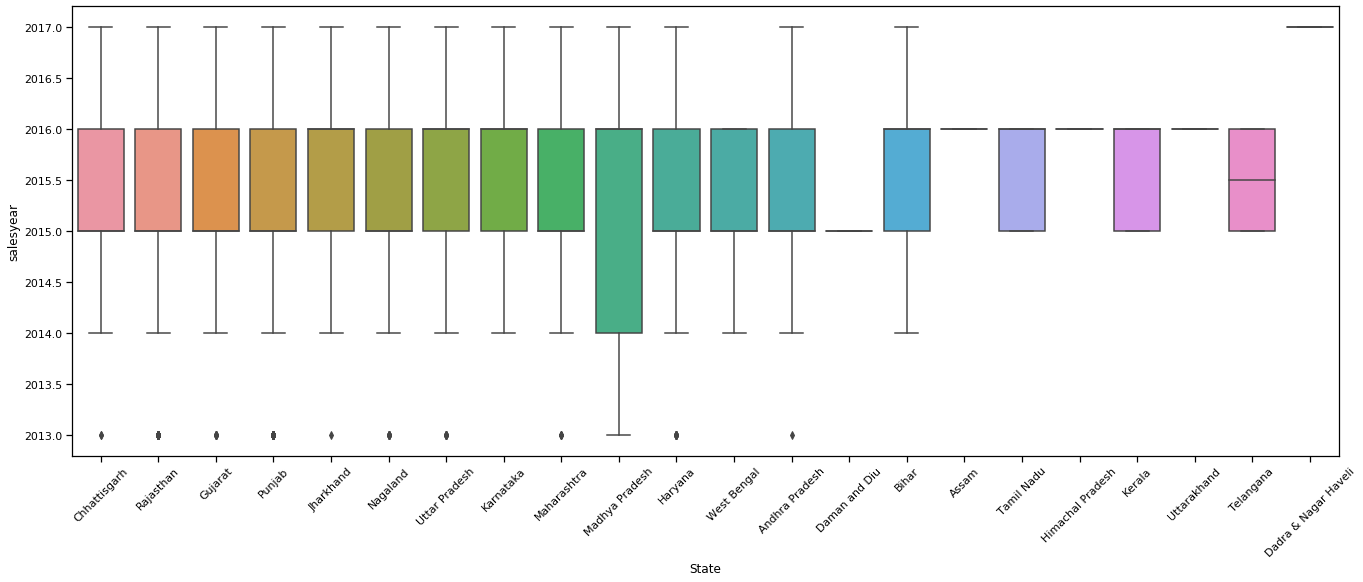

In [53]:
a4_dims = (22.7, 8.27)
#df = mylib.load_data()
fig, ax = plt.subplots(figsize=a4_dims)
chart=sns.boxplot(x = "State", y = "salesyear", data = M1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
None

In [ ]:
x

In [ ]:
#here we can see in which month and state model sell is high

In [54]:
#lets apply top4
text1=a[3]
text1

'3718TC-LPT-10X2'

In [55]:
s['M4']=s["MODEL"].apply(split_it)
s['M4'] = np.where(s['M4'] == s['MODEL'], a[3],None )
#first model dataset
M1=s.loc[s['M4'] == a[3]]

C:\Users\sj\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sj\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
s

,salesyear,MODEL,State,reportyear,M1,M4
0,2014,2518TC-LPT,Haryana,2017,None,None
3,2014,3518TC-LPS,Nagaland,2017,None,None
11,2014,2518TC-LPT,Uttar Pradesh,2017,None,None
14,2015,2518TC-LPT,Uttar Pradesh,2017,None,None
22,2014,2518TC-LPT,Madhya Pradesh,2017,None,None
...,...,...,...,...,...,...
608622,2015,4018TC-LPS,Rajasthan,2019,4018TC-LPS,None
608629,2016,4923TC-LPS-6X4,Rajasthan,2019,None,None
608640,2015,3118TC-LPT,Madhya Pradesh,2019,None,None
608649,2017,3118TC-LPK,Gujarat,2019,None,None


In [57]:
#4 model dataset
M4=s.loc[s['M4'] == a[3]]
M4

,salesyear,MODEL,State,reportyear,M1,M4
76,2015,3718TC-LPT-10X2,Chhattisgarh,2018,None,3718TC-LPT-10X2
515,2016,3718TC-LPT-10X2,Chhattisgarh,2018,None,3718TC-LPT-10X2
728,2016,3718TC-LPT-10X2,Madhya Pradesh,2018,None,3718TC-LPT-10X2
763,2016,3718TC-LPT-10X2,Nagaland,2018,None,3718TC-LPT-10X2
788,2016,3718TC-LPT-10X2,Madhya Pradesh,2018,None,3718TC-LPT-10X2
...,...,...,...,...,...,...
608104,2017,3718TC-LPT-10X2,Gujarat,2019,None,3718TC-LPT-10X2
608187,2017,3718TC-LPT-10X2,Madhya Pradesh,2019,None,3718TC-LPT-10X2
608473,2017,3718TC-LPT-10X2,Maharashtra,2019,None,3718TC-LPT-10X2
608474,2017,3718TC-LPT-10X2,Rajasthan,2019,None,3718TC-LPT-10X2


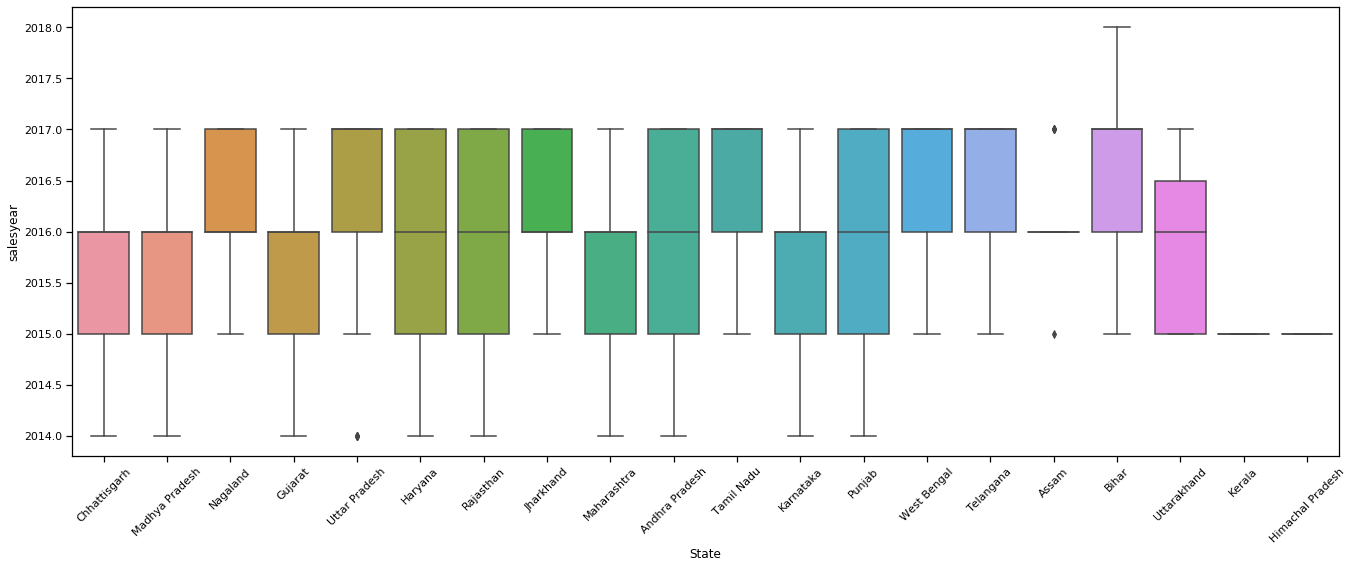

In [58]:
a4_dims = (22.7, 8.27)
#df = mylib.load_data()
fig, ax = plt.subplots(figsize=a4_dims)
chart=sns.boxplot(x = "State", y = "salesyear", data = M4)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
None

In [59]:
#lets try with least value
(df2['MODEL'].value_counts()).tail()

1613TCLPT         1
PRIMALX4028       1
PRIMA-3128K       1
PRIMA4028S        1
4938TC-LPS-6X4    1
Name: MODEL, dtype: int64

# remove some extra words 

In [60]:
op=df2['ACTION_TAKEN'][22]
print(op)

AFFECTED PARTS REPLACED UNDER WARRANTY.DEFER.TXT 0008


In [61]:
df2['ACTION_TAKEN']=df2['ACTION_TAKEN'].str.split('.TXT',1).str[0]

In [62]:
op1=df2['CMPL_DESC'][608640]
print(op1)

ABNORMAL NOSE FROM GEAR BOX. SR NO. 2691D826UY4A1335


In [63]:
df2['CMPL_DESC']=df2['CMPL_DESC'].str.split('. SR',1).str[0]

In [64]:
from wordcloud import WordCloud as wc
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

# NLP 


In [65]:
# max stop words
num_stopwords = df2["CMPL_DESC"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
num_stopwords_action = df2['ACTION_TAKEN'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

print('max number of stopwords in complaint has {} and action has {}'.format(num_stopwords.max(),num_stopwords_action.max()))

max number of stopwords in complaint has 67 and action has 67


In [66]:
#max punctuations
num_punctuation =df2['CMPL_DESC'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
num_punctuations_action =df2['ACTION_TAKEN'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

print('max number of punctuations in complaint has {} and action has {}'.format(num_punctuation.max(),num_punctuations_action.max()))

max number of punctuations in complaint has 237 and action has 237


Remove stopwords and punctuation

In [67]:
sw = stopwords.words('english')
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)
#### punctuation

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [68]:
df2['CMPL_DESC'] = df2['CMPL_DESC'].apply(stopwords)
df2['ACTION_TAKEN']=df2['ACTION_TAKEN'].apply(stopwords)

In [69]:
df2['CMPL_DESC']=df2['CMPL_DESC'].apply(remove_punctuation)
df2['ACTION_TAKEN']=df2['CMPL_DESC'].apply(remove_punctuation)

# Generate word cloud 

In [70]:
def generate_wordcloud(text): 
    wordcloud = wc(relative_scaling = 1.0,stopwords = eng_stopwords).generate(text)
    fig,ax = plt.subplots(1,1,figsize=(15,20))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.margins(x=0, y=0)
    plt.show()

Number of words in all_text: 1714671


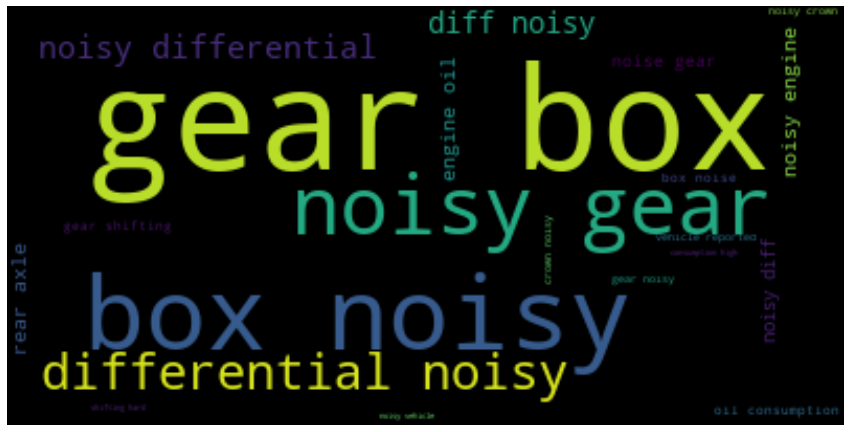

In [71]:
#complaint text 
text_complaint = ' '.join([text for text in df2['CMPL_DESC']])
print('Number of words in all_text:', len(text_complaint))
generate_wordcloud(text_complaint)

Number of words in all_text: 1714671


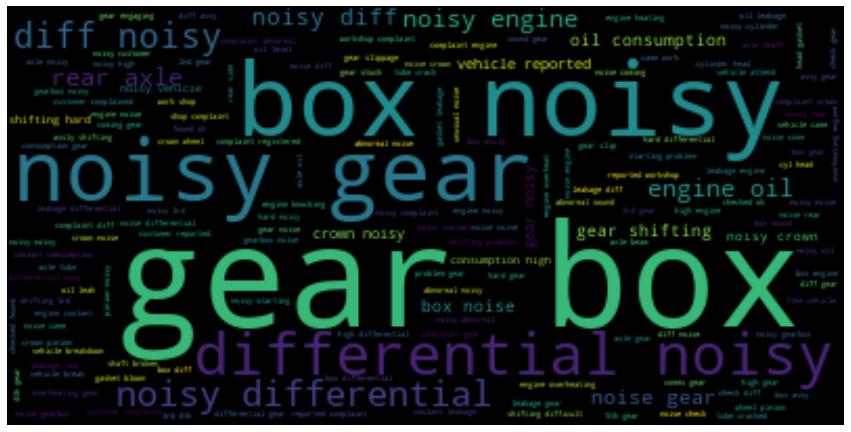

In [72]:
#action taken
all_text_Action=' '.join([text for text in df2['ACTION_TAKEN']])
print('Number of words in all_text:', len(all_text_Action))
generate_wordcloud(all_text_Action)

In [73]:
#now check how many cars have issues and actions are same 
# for safety copy this dataset into other
df3=df2.copy()
df3

,KMS,MODEL,CMPL_DESC,INVESTIGATION,ACTION_TAKEN,REG_NO,RegNo,Place,State,salesyear,repairyear,reportyear,salesmonth,repairmonth,reportmonth
0,221928.0,2518TC-LPT,vehicle come complaint oil leackege rear axle ...,AFTER INVESTIGATION WE FOUND MINOR CRAKE ON RE...,vehicle come complaint oil leackege rear axle ...,HR38U8155,HR38,Faridabad (commercial vehicles only),Haryana,2014,2017,2017,10,10,10
3,185050.0,3518TC-LPS,differential noisy,AFTER INVESTIGATION WE ARE FOUND THAT CROWN TA...,differential noisy,NL01L2162,NL01,Kohima,Nagaland,2014,2017,2017,2,12,12
11,217890.0,2518TC-LPT,vehicle brakedown cac complaint rear axle tube...,WE HAVE ATTEND THE VEHICLE ON SIDE FOUND THAT ...,vehicle brakedown cac complaint rear axle tube...,UP82T2306,UP82,Etah,Uttar Pradesh,2014,2017,2017,8,12,12
14,150723.0,2518TC-LPT,assy gear box noisy,VEHICLE CAME IN OUR WORKSHOP ASSY GEAR BOX NOI...,assy gear box noisy,UP15CT2727,UP15,"Meerut (UP15AT for taxis, UP15AG for governmen...",Uttar Pradesh,2015,2017,2017,8,12,12
22,162639.0,2518TC-LPT,differential noisy,ON INVESTIGATION FOUND THE CROWN AND PINION TE...,differential noisy,MP20HB5022,MP20,Jabalpur,Madhya Pradesh,2014,2017,2017,11,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608622,280617.0,4018TC-LPS,differential noisy 4th gear hard,WE HAVE CHECKED CROWN WHEEL AND FOUND ITS TEET...,differential noisy 4th gear hard,RJ19GE3229,RJ19,Jodhpur,Rajasthan,2015,2019,2019,10,10,10
608629,247856.0,4923TC-LPS-6X4,gear box noisy,THE VEHICLE WAS REPORTED WITH COMP. GEAR BOX N...,gear box noisy,RJ02GB3462,RJ02,Alwar,Rajasthan,2016,2019,2019,6,10,10
608640,397102.0,3118TC-LPT,abnormal nose gear box,WE FOUND UNSUAL NOISE FROM GEAR BOX OIL QTY AN...,abnormal nose gear box,MP06HC7116,MP06,Morena,Madhya Pradesh,2015,2019,2019,10,10,10
608649,42392.0,3118TC-LPK,gear shifting hard differential noisy,TRIAL THE VEHICLE AND FOUND GEAR SHIFTING HARD...,gear shifting hard differential noisy,GJ14X5194,GJ14,Amreli,Gujarat,2017,2019,2019,12,10,10


In [74]:
#1.Gear box issue

In [75]:
text1='gear box'

In [76]:
#1.complaint
x='CMPL_DESC'

df3['gearbox']=df3[x].apply(split_it)

In [77]:
#2 action
x='ACTION_TAKEN'
#text1='parts replaced'
df3['gear_action_taken']=df3[x].apply(split_it)

In [78]:
df3['gearboxmatch'] = np.where(df3['gearbox'] == df3['gear_action_taken'], 'gear box',None )
gear_box = df3.loc[df3['gear_action_taken'] == 'gear box']


In [79]:
gear_box=gear_box.dropna()

In [80]:
gear_box

,KMS,MODEL,CMPL_DESC,INVESTIGATION,ACTION_TAKEN,REG_NO,RegNo,Place,State,salesyear,repairyear,reportyear,salesmonth,repairmonth,reportmonth,gearbox,gear_action_taken,gearboxmatch
14,150723.0,2518TC-LPT,assy gear box noisy,VEHICLE CAME IN OUR WORKSHOP ASSY GEAR BOX NOI...,assy gear box noisy,UP15CT2727,UP15,"Meerut (UP15AT for taxis, UP15AG for governmen...",Uttar Pradesh,2015,2017,2017,8,12,12,gear box,gear box,gear box
47,120060.0,4018TC-LPS,gear box noisy,AFTER CONFIRMING THE COMPLAINT WE DISMENTALLED...,gear box noisy,CG07AZ9097,CG07,Durg,Chhattisgarh,2016,2018,2018,1,3,2,gear box,gear box,gear box
52,110384.0,2518TC-LPK,noise gear box 2nd speed gear clutch system ch...,NO EXTERNAL LEAKAGE FOUND FURTHER DISMANTLED T...,noise gear box 2nd speed gear clutch system ch...,KA42A2402,KA42,Ramanagara,Karnataka,2014,2018,2018,2,1,1,gear box,gear box,gear box
66,140796.0,2518TC-LPK-6X4,noise gear box gear slippage clutch system che...,CHECKED OK FURTHER REMOVED DISMANTLED THE GEAR...,noise gear box gear slippage clutch system che...,KA42A3929,KA42,Ramanagara,Karnataka,2015,2018,2018,3,1,12,gear box,gear box,gear box
76,202522.0,3718TC-LPT-10X2,gear box noisy,AFTER CONFIRMING THE COMPLAINT BY ROAD TEST WE...,gear box noisy,CG07AV2487,CG07,Durg,Chhattisgarh,2015,2018,2018,2,2,12,gear box,gear box,gear box
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608583,295804.0,4018TC-LPS,gear box noisy,ROLLER THRUST BEARING ARRANGEMENT ROTATED SEAT...,gear box noisy,RJ19GE3445,RJ19,Jodhpur,Rajasthan,2015,2019,2019,10,10,10,gear box,gear box,gear box
608607,248575.0,2518TC-LPT,gear box noisy,WE CHECKED AND FOUND THAT DRIVE SHAFT ROLLER S...,gear box noisy,UP83AT7446,UP83,Firozabad,Uttar Pradesh,2015,2019,2019,11,12,11,gear box,gear box,gear box
608629,247856.0,4923TC-LPS-6X4,gear box noisy,THE VEHICLE WAS REPORTED WITH COMP. GEAR BOX N...,gear box noisy,RJ02GB3462,RJ02,Alwar,Rajasthan,2016,2019,2019,6,10,10,gear box,gear box,gear box
608640,397102.0,3118TC-LPT,abnormal nose gear box,WE FOUND UNSUAL NOISE FROM GEAR BOX OIL QTY AN...,abnormal nose gear box,MP06HC7116,MP06,Morena,Madhya Pradesh,2015,2019,2019,10,10,10,gear box,gear box,gear box


Text(0.5, 0, 'Make')

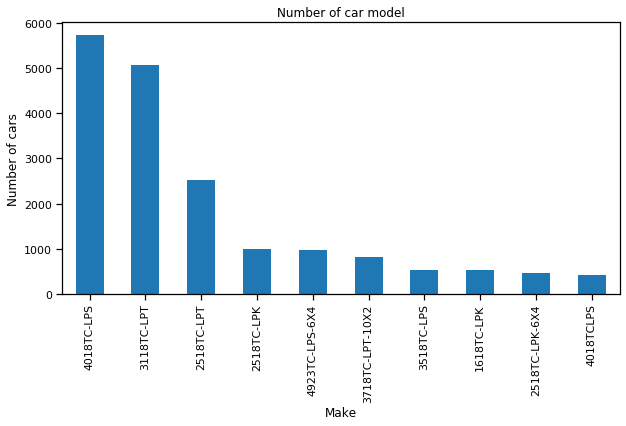

In [81]:
#here we can see issue with gear box and its solve
# Graph
# Plotting a Histogram
gear_box.MODEL.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title('Number of car model')
plt.ylabel('Number of cars')
plt.xlabel('Make')


Text(0.5, 0, 'Make')

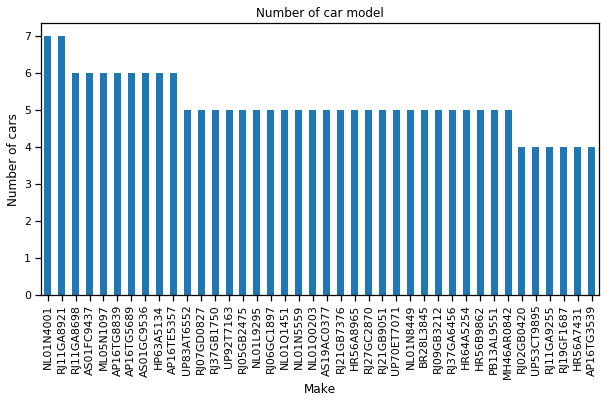

In [82]:
# here same model has different issue.
# Plotting a Histogram
gear_box.REG_NO.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of car model')
plt.ylabel('Number of cars')
plt.xlabel('Make')

In [83]:
# lets do with other issue 
text1='box noisy'


In [84]:
#1.complaint
x='CMPL_DESC'

df3['box_noisy']=df3[x].apply(split_it)

In [85]:
#2 action
x='ACTION_TAKEN'
df3['box_action_taken']=df3[x].apply(split_it)

In [86]:
df3['box_nosiy_match'] = np.where(df3['box_noisy'] == df3['box_action_taken'], 'box noisy',None )
box_noisy = df3.loc[df3['box_action_taken'] == 'box noisy']

In [87]:
box_noisy

,KMS,MODEL,CMPL_DESC,INVESTIGATION,ACTION_TAKEN,REG_NO,RegNo,Place,State,salesyear,...,reportyear,salesmonth,repairmonth,reportmonth,gearbox,gear_action_taken,gearboxmatch,box_noisy,box_action_taken,box_nosiy_match
14,150723.0,2518TC-LPT,assy gear box noisy,VEHICLE CAME IN OUR WORKSHOP ASSY GEAR BOX NOI...,assy gear box noisy,UP15CT2727,UP15,"Meerut (UP15AT for taxis, UP15AG for governmen...",Uttar Pradesh,2015,...,2017,8,12,12,gear box,gear box,gear box,box noisy,box noisy,box noisy
47,120060.0,4018TC-LPS,gear box noisy,AFTER CONFIRMING THE COMPLAINT WE DISMENTALLED...,gear box noisy,CG07AZ9097,CG07,Durg,Chhattisgarh,2016,...,2018,1,3,2,gear box,gear box,gear box,box noisy,box noisy,box noisy
76,202522.0,3718TC-LPT-10X2,gear box noisy,AFTER CONFIRMING THE COMPLAINT BY ROAD TEST WE...,gear box noisy,CG07AV2487,CG07,Durg,Chhattisgarh,2015,...,2018,2,2,12,gear box,gear box,gear box,box noisy,box noisy,box noisy
128,67739.0,1613-LPT,gear box noisy,AFTER CONFIRMING THE COMPLAINT BY ROAD TEST WE...,gear box noisy,CG07BB8385,CG07,Durg,Chhattisgarh,2016,...,2018,7,2,2,gear box,gear box,gear box,box noisy,box noisy,box noisy
162,180887.0,3118TC-LPT,gear box noisy,VEHICLE REPORTED TO OUR WORKSHOP WITH COMPLAIN...,gear box noisy,CG04HQ0265,CG04,Raipur,Chhattisgarh,2014,...,2018,12,4,4,gear box,gear box,gear box,box noisy,box noisy,box noisy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608556,102542.0,4018TC-LPS,gear box noisy,IN THE INVESTIGATION WE REMOVE THE GEAR BOX FR...,gear box noisy,HR56B6087,HR56,Jind (commercial vehicles only),Haryana,2017,...,2019,8,10,10,gear box,gear box,gear box,box noisy,box noisy,box noisy
608583,295804.0,4018TC-LPS,gear box noisy,ROLLER THRUST BEARING ARRANGEMENT ROTATED SEAT...,gear box noisy,RJ19GE3445,RJ19,Jodhpur,Rajasthan,2015,...,2019,10,10,10,gear box,gear box,gear box,box noisy,box noisy,box noisy
608607,248575.0,2518TC-LPT,gear box noisy,WE CHECKED AND FOUND THAT DRIVE SHAFT ROLLER S...,gear box noisy,UP83AT7446,UP83,Firozabad,Uttar Pradesh,2015,...,2019,11,12,11,gear box,gear box,gear box,box noisy,box noisy,box noisy
608629,247856.0,4923TC-LPS-6X4,gear box noisy,THE VEHICLE WAS REPORTED WITH COMP. GEAR BOX N...,gear box noisy,RJ02GB3462,RJ02,Alwar,Rajasthan,2016,...,2019,6,10,10,gear box,gear box,gear box,box noisy,box noisy,box noisy


Text(0.5, 0, 'Make')

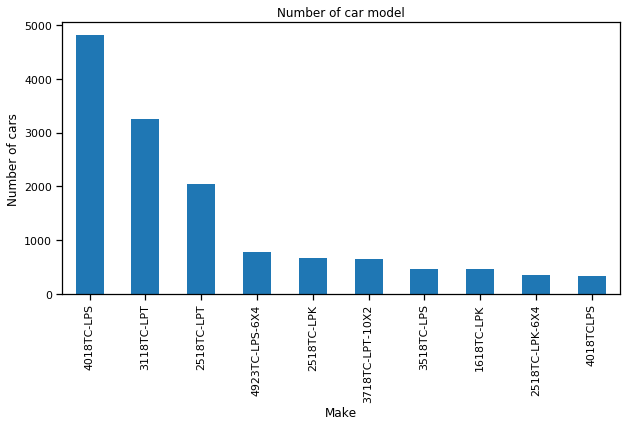

In [88]:
# now again check which model has this issue most
# Plotting a Histogram
box_noisy.MODEL.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title('Number of car model')
plt.ylabel('Number of cars')
plt.xlabel('Make')

Text(0.5, 0, 'Make')

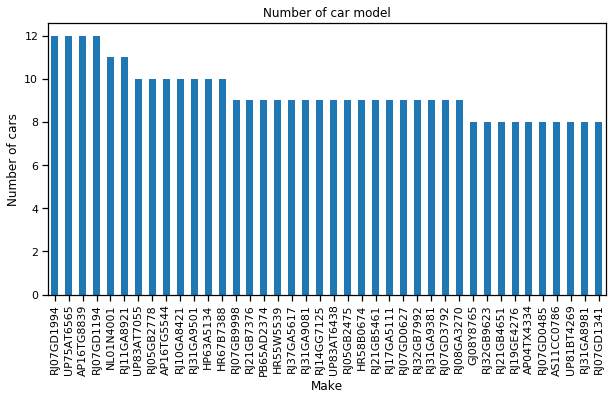

In [89]:
# here same model has different issue.
# Plotting a Histogram
df3.REG_NO.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of car model')
plt.ylabel('Number of cars')
plt.xlabel('Make')

In [90]:
# this is how we can see that many cars has several issues but most common issue is gear box and noisy box. 